In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Split the data as Feature and Label

In [5]:
featured_x = data.drop('target',axis=1)
target_y = data['target']

In [6]:
featured_x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
target_y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
featured_x.shape, target_y.shape

((303, 13), (303,))

In [9]:
# Train - test - Split

In [10]:
from sklearn.model_selection import train_test_split

In [53]:
#np.random.seed(1)

#split train -test
x_train,x_test,y_train,y_test = train_test_split(featured_x,target_y,test_size=0.2)

In [13]:
x_train.shape, y_train.shape

((242, 13), (242,))

In [14]:
x_test.shape, y_test.shape

((61, 13), (61,))

In [15]:
  ##############################################
    ####################################################
    
    ## CHOSSING THE BEST MODEL ( LogisticRegression or K-NearestNeighbors or RandomForestClassifier)
    
    #############################################
 #########################################################

* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
#Creating a dictionary to access all of the model same time
model_dict = {'logistic':LogisticRegression(),
             'kneighbor':KNeighborsClassifier(),
             'randomForest':RandomForestClassifier()}

In [18]:
model_dict

{'logistic': LogisticRegression(),
 'kneighbor': KNeighborsClassifier(),
 'randomForest': RandomForestClassifier()}

In [59]:
#creating a function to fit and getting score of models 
def model_fit_score(model,x_train,x_test,y_train,y_test):
    np.random.seed(2)
    model_score = {}
    
    for name,model in model_dict.items():
        #Fit the models
        model.fit(x_train,y_train)
        #Evaluate the model
        model_score[name] = model.score(x_test,y_test)
    return model_score
        

In [60]:
#Running the function
model_score = model_fit_score(model=model_dict, x_train= x_train,x_test=x_test,y_train = y_train,y_test=y_test)

model_score

C:\Users\Nill\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'logistic': 0.8688524590163934,
 'kneighbor': 0.5901639344262295,
 'randomForest': 0.8524590163934426}

In [61]:
##################
# Comapring all the model with DF
##################

In [62]:
model_compare = pd.DataFrame(model_score,index=['accuracy'])

In [63]:
model_compare

,logistic,kneighbor,randomForest
accuracy,0.868852,0.590164,0.852459


In [64]:
model_compare = model_compare.T

In [65]:
model_compare

,accuracy
logistic,0.868852
kneighbor,0.590164
randomForest,0.852459


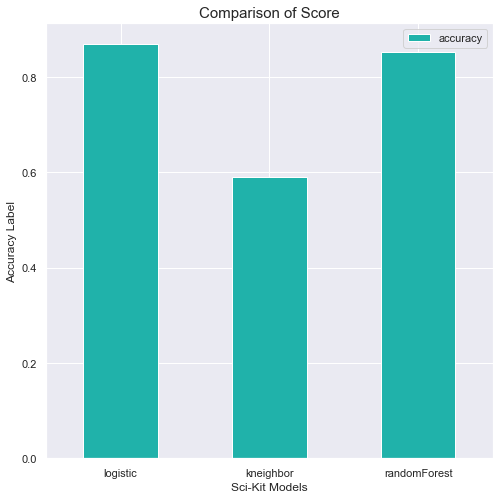

In [66]:
model_compare.plot(figsize=(8,8), kind='bar',color=['lightseagreen'])
plt.xlabel('Sci-Kit Models')
plt.ylabel('Accuracy Label')

plt.title('Comparison of Score',fontsize=15)
plt.xticks(rotation=0)

plt.show()

In [37]:
#As the result K-Nearest Neighbors is showing is lesser than Logistic and RandomForest . Better to discard it

### Hyperparameter by RandomizedSearchCV

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
#Logistic Regression Params ( Research online for more paramater tunning and the best value to use)

logistic_params = {'C': np.logspace(-4,4,20), 
                  'solver':['liblinear']}

In [49]:
#RandomForest Classifier Params ( Research online for more paramater tunning and the best value to use)

forest_params = {'n_estimators':np.arange(100,1000,50),
              'max_depth':[None,3,5,10],
              'min_samples_split':np.arange(2,10,2),
              'min_samples_leaf':np.arange(1,20,2)}

## Tunning Parameters for LogisticRegression with RandomizedSearchCV

In [54]:
np.random.seed(12)

random_log = RandomizedSearchCV(LogisticRegression(),cv=5,param_distributions=logistic_params,verbose=True,n_iter=20)

#fitting the model
random_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [55]:
#best_params_
random_log.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [56]:
### LogisticRegression Score with RandomizedSearchCV

In [57]:
random_log.score(x_test,y_test)

0.9016393442622951

## Tunning the parameters of RandomForestClassifier with RandomizedSearchCV

In [58]:
np.random.seed(12)

random_forest = RandomizedSearchCV(RandomForestClassifier(),cv=5,param_distributions=forest_params,verbose=True,n_iter=20)

#Fitting the RandomizedSearchCV 

random_forest.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=True)

In [51]:
#best_params_
random_forest.best_params_

{'n_estimators': 700,
 'min_samples_split': 6,
 'min_samples_leaf': 11,
 'max_depth': 3}

In [52]:
#Evaluate score
random_forest.score(x_test,y_test)

0.8032786885245902

### Comparing Randomized searcg Score with Baseline searcg Score

In [68]:
randomized_score_dict = {'RandomScv_Forest': random_forest.score(x_test,y_test),
                        'RandomScv_Logistic':random_log.score(x_test,y_test)}
randomized_seach_score = pd.DataFrame(randomized_score_dict,index=['accuracy'])

In [69]:
randomized_seach_score

,RandomScv_Forest,RandomScv_Logistic
accuracy,0.852459,0.901639


In [71]:
baseline_score = pd.DataFrame(model_score,index=['accuracy'])
baseline_score

,logistic,kneighbor,randomForest
accuracy,0.868852,0.590164,0.852459


In [81]:
new_score = baseline_score.copy()
new_score[['RSCV_forest','RSCV_logistic']] = randomized_seach_score[['RandomScv_Forest','RandomScv_Logistic']]

In [82]:
new_score

,logistic,kneighbor,randomForest,RSCV_forest,RSCV_logistic
accuracy,0.868852,0.590164,0.852459,0.852459,0.901639


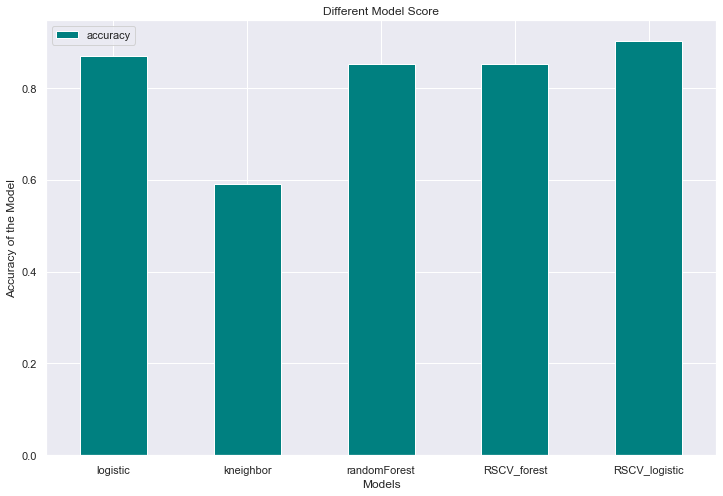

In [86]:
new_score.T.plot(figsize=(12,8), kind='bar',color='teal')

plt.title('Different Model Score')

plt.ylabel('Accuracy of the Model')
plt.xlabel('Models')

plt.xticks(rotation=0)


plt.show()

## LogisticRegression has the high efficiency rate. 
* TIme to improve on LogisticRegression

# GRID SEARCH CV

In [89]:
from sklearn.model_selection import GridSearchCV

In [88]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [100]:
grid_logistic_params = {'C':np.logspace(-4,4,40),
                       'solver':['liblinear']}

In [101]:
## Grid Search CV
np.random.seed(43)

logistic_with_gridSearch = GridSearchCV(LogisticRegression(),param_grid=grid_logistic_params,cv=5,verbose=True)

#Fitting the model
logistic_with_gridSearch.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [102]:
#gridSearch best_params_
logistic_with_gridSearch.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [103]:
#Evalute gridSearchCv
logistic_with_gridSearch.score(x_test,y_test)

0.9016393442622951

In [97]:
### Compare with RandomSearchCV and GridSearchCV
logSearchCV = {'randomSearchCV': random_log.score(x_test,y_test),
              'gridSearchCV': logistic_with_gridSearch.score(x_test,y_test)}
logCompareSearchCV = pd.DataFrame(logSearchCV,index=['accuracy'])

In [98]:
logCompareSearchCV

,randomSearchCV,gridSearchCV
accuracy,0.901639,0.901639


## EVALUTE THE CLASSIFIER MORE TO GET THE BEST ACCURACY

In [106]:
#prediction results from GridSearchCV and Compare to Test Data
y_preds = logistic_with_gridSearch.predict(x_test)

In [107]:
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [108]:
np.array(y_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

### SkLearn Metrics Functions to get better report

In [104]:
#ROC CURVE for getting AUC result
# A perfect model will have AUC curve =1 

### ROC CURVE 

In [109]:
from sklearn.metrics import plot_roc_curve

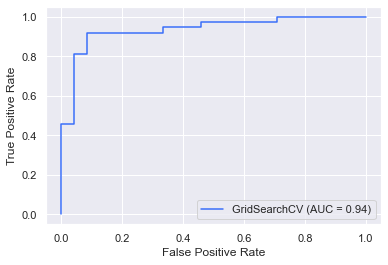

In [114]:

plot_roc_curve(logistic_with_gridSearch,x_test,y_test);

* AUC has = 0.94 which is close to 1

### CONFUSION MATRIX # TO understanding True Positive and False Positive

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
confusion_matrix(y_test,y_preds)

array([[22,  2],
       [ 4, 33]], dtype=int64)

In [130]:
#visualize the confusion matrix with heatmap
def plot_confusion_matrix(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False,cmap='brg')
    
    plt.xlabel('True Label')
    plt.ylabel('Predictable Label')
    
    plt.show()

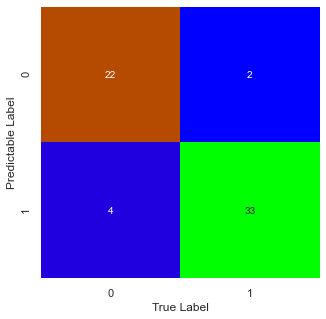

In [131]:
plot_confusion_matrix(y_test,y_preds)

* here the annot value = top_right, is false negative = model predict 0(negative) when the truth is 1 which means False negative predict
* here the annot value = bottom_left, is false positive = model predict 1(positive) when the truth is 0 which means False positive predict

### More metrics Functions for more model summary
* Classification Report
* Precision
* F1 score
* Recall score

In [133]:
from sklearn.metrics import classification_report,precision_score,f1_score,recall_score

In [134]:
#simple classification report #only on one simple test data not cross validated
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.94      0.89      0.92        37

    accuracy                           0.90        61
   macro avg       0.89      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



* precision = A model that has no False positive will be value of 1.00
* recall = A model that has no False Negative will be value of 1.00
* f1 = is a combination of precision and recall
* support = samples, like how many of the sample values has 1(heart disease) or 0(not heart Disease)

### Using cross-validation evaluate precision,f1,recall

#### scoring parameter

In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
#best_params
logistic_with_gridSearch.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [137]:
clf_best = LogisticRegression(C=0.49238826317067363, solver='liblinear')

In [139]:
#Function to get the cross-validate metrics result

In [143]:
def cv_metrics_report(model,x,y):
    accuracy = cross_val_score(model,x,y,cv=5,scoring='accuracy')
    precision = cross_val_score(model,x,y,cv=5,scoring='precision')
    recall = cross_val_score(model,x,y,cv=5,scoring='recall')
    f1 = cross_val_score(model,x,y,cv=5,scoring='f1')
    data_dict = { 'Accuracy': np.mean(accuracy),
                'Precision': np.mean(precision),
                'Recall': np.mean(recall),
                'f1':np.mean(f1)}
    
    
    return data_dict

In [145]:
cv_data_dict = cv_metrics_report(clf_best,featured_x,target_y)

In [146]:

cv_data_report = pd.DataFrame(cv_data_dict,index=[0])

In [147]:
cv_data_report

,Accuracy,Precision,Recall,f1
0,0.83153,0.813913,0.90303,0.854802


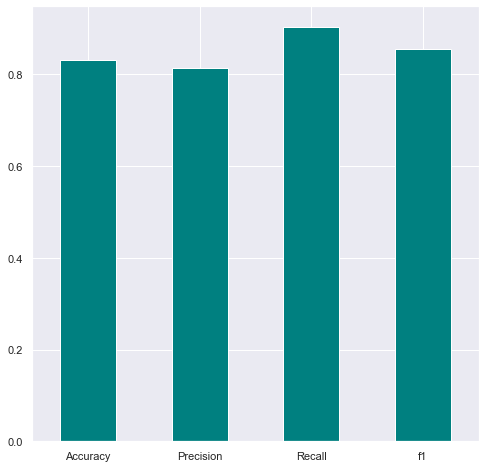

In [149]:
cv_data_report.T.plot(kind='bar',figsize=(8,8),color='teal',legend=False);
plt.xticks(rotation=0);

## FEATURE IMPORTANCE

In [150]:
clf_best.fit(x_train,y_train)

LogisticRegression(C=0.49238826317067363, solver='liblinear')

In [151]:
#getting the co_efficient of features
clf_best.coef_

array([[ 0.00823931, -0.97842628,  0.68767305, -0.00842971, -0.00401389,
        -0.24201431,  0.34868884,  0.0271999 , -0.61891971, -0.4730671 ,
         0.46007113, -0.86162363, -0.87367098]])

In [152]:
#Matching it to the columns name
feature_dict = dict(zip(data.columns, list(clf_best.coef_[0])))
feature_dict

{'age': 0.008239306850813774,
 'sex': -0.9784262829202888,
 'cp': 0.687673051060731,
 'trestbps': -0.008429706417481189,
 'chol': -0.004013891922985577,
 'fbs': -0.24201430992119985,
 'restecg': 0.3486888404708978,
 'thalach': 0.027199903109083313,
 'exang': -0.6189197142308689,
 'oldpeak': -0.47306710238436583,
 'slope': 0.46007112850016363,
 'ca': -0.8616236277820599,
 'thal': -0.8736709752608738}

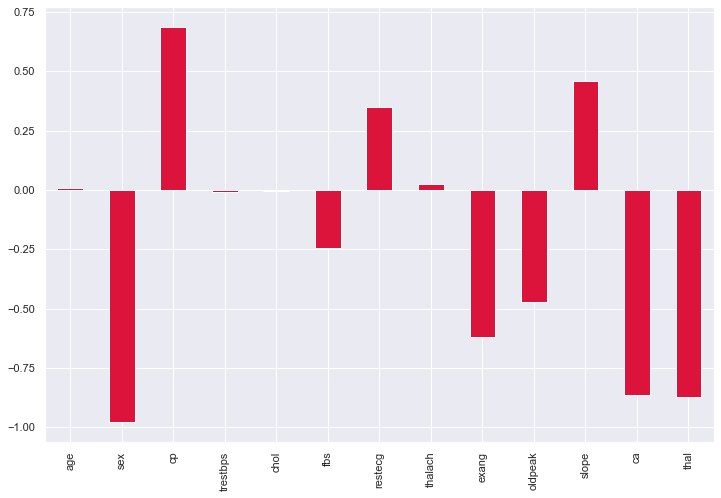

In [153]:
feature_coef_df = pd.DataFrame(feature_dict,index=[0])
feature_coef_df.T.plot(kind='bar',figsize=(12,8),legend=False,color=['crimson']);